<a href="https://colab.research.google.com/github/borglab/gtsfm/blob/add-colab/notebooks/gtsfm_door_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up Python 3.8 Environment
Adapted from https://gist.github.com/ngrislain/c3ba6f687c64ce31adc6b0dff1b26d6a

In [1]:
!wget -O mini.sh https://repo.anaconda.com/miniconda/Miniconda3-py38_4.8.2-Linux-x86_64.sh
!chmod +x mini.sh
!bash ./mini.sh -b -f -p /usr/local
!conda install -q -y jupyter
!conda install -q -y google-colab -c conda-forge
!python -m ipykernel install --name "py38" --user

--2022-09-22 18:16:58--  https://repo.anaconda.com/miniconda/Miniconda3-py38_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89817099 (86M) [application/x-sh]
Saving to: ‘mini.sh’

mini.sh             100%[===================>]  85.66M   159MB/s    in 0.5s    

2022-09-22 18:16:58 (159 MB/s) - ‘mini.sh’ saved [89817099/89817099]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py38_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py38_0
    - cffi==1.14.0=py38h2e261b9_0
    - chardet==3.0.4=py38_1003
    - conda-package-handling==1.6.0=py38h7b6447c_0
    - conda==4.8.2=py38_0
    - cryptography==2.8=

In [2]:
# Reload the web page and execute this cell
import sys
print("User Current Version:-", sys.version)
!conda --version

User Current Version:- 3.7.14 (default, Sep  8 2022, 00:06:44) 
[GCC 7.5.0]
conda 4.14.0


# Clone GTSfM repository and set up environment

In [3]:
!git clone --quiet --recursive https://github.com/borglab/gtsfm.git
%cd /content/gtsfm

/content/gtsfm


In [4]:
%%shell
conda env update --file environment_linux.yml
pip install -e .

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ 

Before running reconstruction, if you intend to use modules with pre-trained weights, such as SuperPoint, SuperGlue, or PatchmatchNet, please first run:

In [5]:
!./download_model_weights.sh

Creating ./thirdparty/SuperGluePretrainedNetwork/models/weights
--2022-09-22 18:29:41--  https://github.com/magicleap/SuperGluePretrainedNetwork/raw/master/models/weights/superpoint_v1.pth
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/magicleap/SuperGluePretrainedNetwork/master/models/weights/superpoint_v1.pth [following]
--2022-09-22 18:29:41--  https://raw.githubusercontent.com/magicleap/SuperGluePretrainedNetwork/master/models/weights/superpoint_v1.pth
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5206086 (5.0M) [application/octet-stream]
Saving to: ‘./thirdparty/SuperGluePretrainedNetwor

In [6]:
%%shell
eval "$(conda shell.bash hook)" # copy conda command to shell
conda activate gtsfm-v1
python --version
pip install -e .

Python 3.8.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/gtsfm
  Preparing metadata (setup.py) ... done
  Running setup.py develop for gtsfm


In [7]:
pwd

'/content/gtsfm'

# Run GTSfM on the door dataset

Plot image sequence.

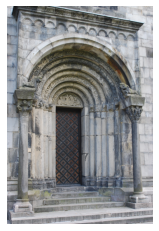

In [8]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation

frames = [] # for storing the generated images
fig = plt.figure()
plt.axis('off')
for i in range(1, 13):
  _img = plt.imread("/content/gtsfm/tests/data/set1_lund_door/images/DSC_%04d.JPG" % i)
  frames.append([plt.imshow(_img, animated=True)])
ani = animation.ArtistAnimation(fig, frames, interval=500, blit=True, repeat_delay=1000)

from IPython.display import HTML
HTML(ani.to_jshtml())

In [9]:
%%shell
eval "$(conda shell.bash hook)" # copy conda command to shell
conda activate gtsfm-v1
python gtsfm/runner/run_scene_optimizer_olssonloader.py \
--dataset_root tests/data/set1_lund_door --image_extension JPG \
--config_name sift_front_end.yaml --num_workers 1


INFO - 2022-09-22 18:30:08,006 - font_manager - generated new fontManager
[2022-09-22 18:30:12,490 INFO gtsfm_runner_base.py line 161 4957] 

SceneOptimizer: <gtsfm.scene_optimizer.SceneOptimizer object at 0x7feead87f070>
INFO - 2022-09-22 18:30:12,490 - gtsfm_runner_base - 

SceneOptimizer: <gtsfm.scene_optimizer.SceneOptimizer object at 0x7feead87f070>
[2022-09-22 18:30:17,513 INFO sequential_retriever.py line 42 5020] Found 66 pairs from the SequentialRetriever
INFO - 2022-09-22 18:30:17,513 - sequential_retriever - Found 66 pairs from the SequentialRetriever
INFO - 2022-09-22 18:30:18,247 - loader_base - Image 0 resized from (H,W)=(1936,1296) -> (1135,760)
INFO - 2022-09-22 18:30:18,310 - loader_base - Image 1 resized from (H,W)=(1936,1296) -> (1135,760)
INFO - 2022-09-22 18:30:18,370 - loader_base - Image 2 resized from (H,W)=(1936,1296) -> (1135,760)
INFO - 2022-09-22 18:30:18,432 - loader_base - Image 3 resized from (H,W)=(1936,1296) -> (1135,760)
INFO - 2022-09-22 18:30:18,494 

# Visualize reconstruction with `visu3d`

In [10]:
%pip install numpy>=1.21 lark einops plotly etils[ecolab] jax[cpu] tf-nightly tfds-nightly sunds
!cd thirdparty && git clone https://github.com/google-research/visu3d.git
!cd thirdparty && git clone https://github.com/google-research/dataclass_array.git

ERROR: matplotlib 3.6.0 has requirement numpy>=1.19, but you'll have numpy 1.17.5 which is incompatible.
ERROR: scipy 1.9.1 has requirement numpy<1.25.0,>=1.18.5, but you'll have numpy 1.17.5 which is incompatible.
ERROR: jaxlib 0.3.15 has requirement numpy>=1.19, but you'll have numpy 1.17.5 which is incompatible.
ERROR: jax 0.3.17 has requirement numpy>=1.20, but you'll have numpy 1.17.5 which is incompatible.
ERROR: tf-nightly 2.11.0.dev20220921 has requirement numpy>=1.20, but you'll have numpy 1.17.5 which is incompatible.
Cloning into 'visu3d'...
remote: Enumerating objects: 479, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 479 (delta 35), reused 28 (delta 27), pack-reused 383
Receiving objects: 100% (479/479), 6.07 MiB | 28.37 MiB/s, done.
Resolving deltas: 100% (335/335), done.
Cloning into 'dataclass_array'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (7/7), done.
remote: Compres

In [11]:
import sys
sys.path.append("/usr/local/lib/python3.8/site-packages")

# import visu3d as v3d
# import dataclass_array as dca

from etils.ecolab.lazy_imports import *

from thirdparty.colmap.scripts.python.read_write_model import read_model
sys.path.append("thirdparty/dataclass_array/")
sys.path.append("thirdparty/visu3d/")
import thirdparty.visu3d.visu3d as v3d

ecolab.auto_plot_array()  # Display np.array as images/video
tnp.experimental_enable_numpy_behavior()  # Activate TF numpy behavior

cameras, images, points3d = read_model("results/ba_output")
pcd = np.array([_p3d.xyz for _p3d in points3d.values()])
rgb = np.array([_p3d.rgb for _p3d in points3d.values()])
cams = []
for _i in images.values():
    _c = cameras[_i.camera_id]
    R = _i.qvec2rotmat()
    t = (-R.T @ _i.tvec.reshape((3, 1))).flatten()
    cams.append(
        v3d.Camera(
             spec=v3d.PinholeCamera.from_focal(resolution=(_c.height, _c.width), focal_in_px=_c.params[0]),
             world_from_cam=v3d.Transform(R=R.T, t=t)
        )
    )

point_cloud = v3d.Point3d(
    p=pcd,
    rgb=rgb,
)
v3d.make_fig([*cams, point_cloud,])

Display big np/tf/jax arrays as image for nicer IPython display


Detected model format: '.txt'
